<a href="https://colab.research.google.com/github/kstatimiznakomi/soft-dev-tech/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы оптимизации

1) Написать класс **StochasticGradientDesent**, который ищет минимальное значение функции при помощи одномерного **стохастического градиентного спуска**.

- Функция, для которой нужно найти минимум 5*sin(2*x) + x**2
- За значения параметров по умолчанию взять learning_rate=0.01, eps=0.001, n_iter=100
- За **начальное приближение вектора** взять **случайное число из X**
- За случайный объект при вычислении градимента брать **случайное число из X**
- Если хотите отобразить результаты  на графике, то сохраняйте получаенные случайные значения на каждом этапе цикла **СРАЗУ** в СПИСОК (в в материалах solutions_), А НЕ ПОСЛЕ ВЫЧИСЛЕНИЯ ГРАДИЕНТА
- В качестве названия метода в классе для поиска минимума используйте название **fit()**

In [1]:
# Найти минимум функции 5*sin(2*x) + x**2
import numpy as np
import matplotlib.pyplot as plt
# class
class StochasticGradientDesent:
    """
    Алгоритм градиентного спуска
    """

    def __init__(self, n_iter: int, learning_rate: float, eps: float):
        """
        Parameters
        ----------
        n_iter - кол-во итераций
        learning_rate - скорость градиентного спуска
        eps - условие останова
        """
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.eps = eps

    @staticmethod
    def function(x: float) -> float:
        """
        Целевая функция: 5*sin(2*x) + x^2
        """
        return 5 * np.sin(2 * x) + x ** 2

    @staticmethod
    def function_derivative(x: float) -> float:
        """
        Производная функции: 10*cos(2*x) + 2*x
        """
        return 10 * np.cos(2 * x) + 2 * x

    def fit(self, X) -> dict:
        """
        Поиск оптимальных параметров

        Parameters
        ----------
        X - значения по оси OX
        y - значения по оси OY

        Returns
        -------
        Словарь с результатами оптимизации
        """
        result = dict()

        # список с точками на оси OX и OY соответственно
        solutions_x, solutions_y = list(), list()
        # список с номером итерации и значением ошибки соответственно
        iters, error = list(), list()

        # Находим начальное приближение вектора / либо = 0
        x_pred = np.random.choice(X)

        # Далее проходим по циклу n-раз
        for i in range(self.n_iter):
            # сохраняем точки X для нанесения на график OX
            solutions_x.append(x_pred)

            # сохраняем точки Y для нанесения на график OY
            solutions_y.append(self.function(x_pred))

            # Находим приближение вектора на предыдущей итерации (n-1) и
            gradient = self.function_derivative(x_pred)

            # можно регулировать шаг
            # self.learning_rate = self.learning_rate/(i+1)

            # вычитаем из вектора на предыдущей итерации вектор градиента
            # на предыдущей итерации
            x_next = x_pred - self.learning_rate * gradient

            # добавляем в ошибки в список, а также номер итерации
            error.append(abs(x_next - x_pred))
            iters.append(i)

            # условие останова
            if abs(x_next - x_pred) < self.eps:
                break

            # Сохраним предыдущее значение вектора при условии,
            # что не вышли из цикла
            x_pred = x_next.copy()

        # min_x, min_y - найденные точки минимума
        result = {
            "solutions_x": solutions_x,
            "solutions_y": solutions_y,
            "iters": iters,
            "error": error,
            "min_x": solutions_x[-1],
            "min_y": solutions_y[-1],
        }

        return result

2) Обучение оптимизатора и поиск минимума функции

- **За минимальное значение X на графике взять -5, за максимальное 6.1**, то есть область определения [-5,6.1]
- Создайте экземпляр класса **StochasticGradientDesent**, который описали выше (стохастический градиентный спуск).
- Подайте на вход **следующие значения**:
    - Кол-во итераций = 100 (n_iter)
    - Скорость обьучения = 0.001 (learning_rate)
    - Ошибка 0.001 (eps)
- Вызовите метод **fit()** из экзепляра класса для поиска минимума, записав результат в переменную **result** в виде словаря
- Не забывайте про то, чтобы также вычислить значения для оси OY (пример в лекции) для дальнейшей отрисовки графика

In [2]:
# Мин и макс значения по оси OX
x_min, x_max = -5.0, 6.1
# Значения по OX
X = np.arange(x_min, x_max, 0.1)
# определяем экземпляр класса Gradient Desent
clf = StochasticGradientDesent(n_iter=100, learning_rate=0.1, eps=0.001)
# применяем метод gradient_descent() для поиска минимума
result = clf.fit(X)
# Значения по оси OY на основании X
y = clf.function(X)

3) Отобразите **ДВА рисунка в одной строке, но в разных столбцах**, где:
- Первый рисунок - это **график исходной функции** с изображением поэтапного поиска **минимума** (используйте также данные из переменной result), где конечное значение - минимум будет отображен при помощи зеленой точки (смотреть пример в лекции)
- Второй рисунок - **График зависимости** количества итераций от ошибки
- Не пугайтесь, что ваш алгоритм может находить далеко не самое минимальное значение

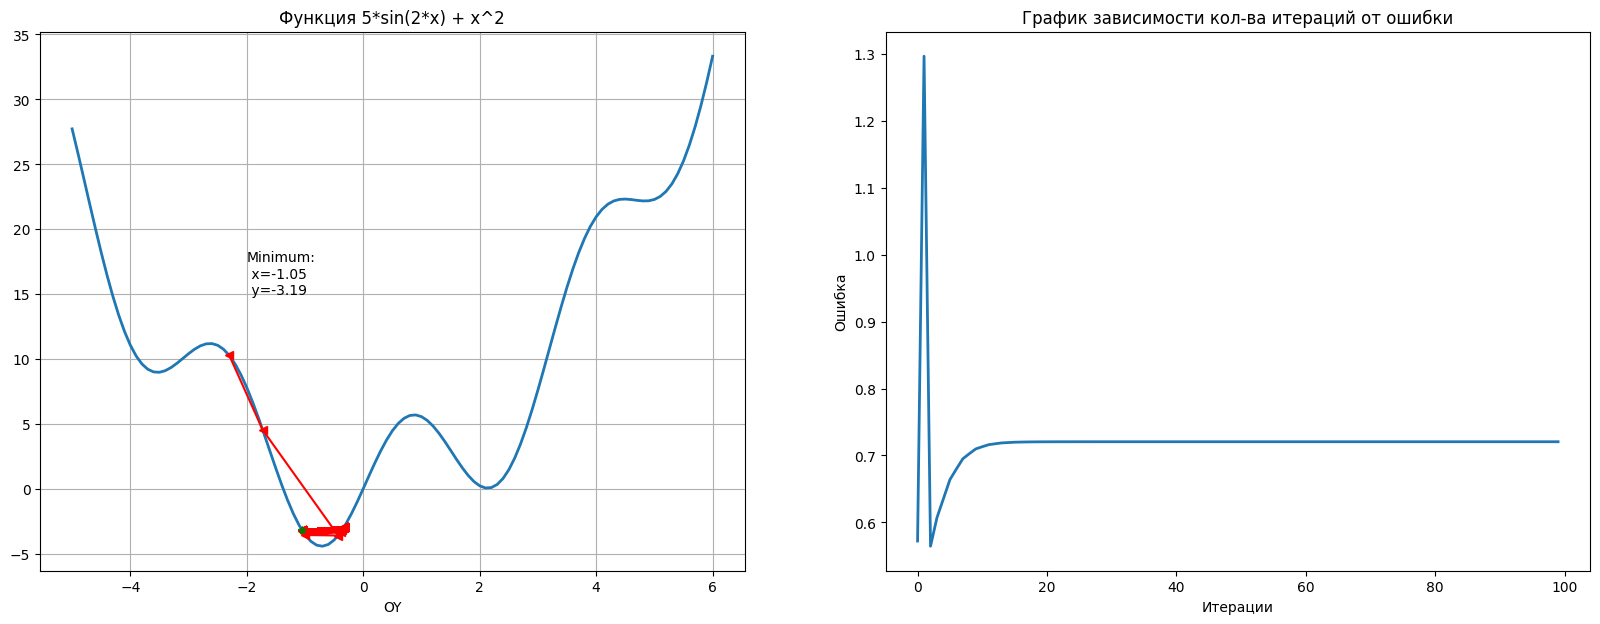

In [4]:
# ваш код
fig, axes = plt.subplots(ncols=2, figsize=(20, 7))

axes[0].set_title('Функция 5*sin(2*x) + x^2')
axes[0].plot(X, y, linewidth=2)
axes[0].plot(result['solutions_x'], result['solutions_y'], '<-', color='red')
axes[0].plot(result['min_x'], result['min_y'], '*', color='green')
axes[0].text(
    -2,
    15,
    f'Minimum:\n x={round(result["min_x"], 2)}\n y={round(result["min_y"], 2)}',
    fontsize=10,
    color='black')
axes[0].set_xlabel('OX')
axes[0].set_xlabel('OY')
axes[0].grid()

axes[1].set_title('График зависимости кол-ва итераций от ошибки')
axes[1].plot(result['iters'], result['error'], linewidth=2)
axes[1].set_xlabel('Итерации')
axes[1].set_ylabel('Ошибка')
plt.show()

4) **Выведите минимальные значения x и y** (координаты по OX и OY), полученные при помощи данного метода оптимизации при помощи print(), **округлите** значения до двух знаков после запятой


Близки ли результаты к глобальному минимуму? Не нашел ли ваш алгоритм локальный минимум?

In [8]:
# ваш код
print(f"x: {round(result['min_x'], 2)}")
print(f"y: {round(result['min_y'], 2)}")
# Результаты близки к глобальному минимуму

x: -1.05
y: -3.19


5) Сравните со значениями, получеными при помощи встроенного метода оптимизации **'Nelder-Mead'**  в scipy.
- Выведите полный результат работы метода (пример в лекции)
- Выведите отдельно минимальные значения x и y, а также кол-во итераций
- Округлите значения минимума (координаты по OX и OY) до двух знаков после запятой

Близки ли результаты к глобальному минимуму? Не нашел ли ваш алгоритм локальный минимум?

In [6]:
# ваш код
from scipy.optimize import minimize
res = minimize(clf.function, x0=100, method='Nelder-Mead')
print(res)
print(f"Минимум по OX: {round(res.x[0], 2)}")
print(f"Минимум по OY: {round(res.fun, 2)}")
print(f"Количество итераций: {res.nit}")
# Результаты близки к глобальному минимуму

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -4.439314122887997
             x: [-7.138e-01]
           nit: 25
          nfev: 51
 final_simplex: (array([[-7.138e-01],
                       [-7.137e-01]]), array([-4.439e+00, -4.439e+00]))
Минимум по OX: -0.71
Минимум по OY: -4.44
Количество итераций: 25


6) Сравните со значением, полученым при помощи встроенного метода оптимизации **'BFGS'** (алгоритм Бройдена — Флетчера — Гольдфарба — Шанно) в scipy.
- Выведите полный результат работы метода (пример в лекции)
- Выведите отдельно минимальные значения x и y, а также кол-во итераций
- Округлите значения минимума (координаты по OX и OY) до двух знаков после запятой

Близки ли результаты к глобальному минимуму? Не нашел ли ваш алгоритм локальный минимум?

In [7]:
# ваш код
from scipy.optimize import minimize
res = minimize(clf.function, x0=100, method='BFGS')
print(res)
print(f"Минимум по OX: {round(res.x[0], 2)}")
print(f"Минимум по OY: {round(res.fun, 2)}")
print(f"Количество итераций: {res.nit}")
# Алгоритм нашёл локальный минимум

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.03956438170794829
        x: [ 2.136e+00]
      nit: 8
      jac: [ 5.960e-08]
 hess_inv: [[ 4.979e-02]]
     nfev: 32
     njev: 16
Минимум по OX: 2.14
Минимум по OY: 0.04
Количество итераций: 8


7) Какой из алгоритмов оказался наилучшим?

По результатам наилучшим алгоритмом себя показал **Метод Нелдера — Мида (Nelder-Mead)**, встронный в scipy